In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("../data/train.csv")
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
## Dropping id and Name column
data = data.drop(["id", "Name"], axis=1)
data.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [5]:
def return_value_counts(col):
    print("Count of unique values in " + col + " column are:\n", data[col].value_counts())

def return_null_values(col):
    print(str("Null values in " + col + " column are ="), data[col].isnull().sum())

In [6]:
## Gender column
return_null_values("Gender")

Null values in Gender column are = 0


In [7]:
return_value_counts("Gender")

Count of unique values in Gender column are:
 Gender
Male      77464
Female    63236
Name: count, dtype: int64


Since, we know there is no ordinal relationship in "Gender" column, therefore, instead of label encoding (0, 1), I am using one-hot encoding.

In [8]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the Gender column
gender_encoded = one_hot_encoder.fit_transform(data[['Gender']])
gender_encoded

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [9]:
## Create the dataframe with column names for Gender
df_encoded = pd.DataFrame(
    gender_encoded, columns=one_hot_encoder.get_feature_names_out(["Gender"])
)
df_encoded.head()

,Gender_Female,Gender_Male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [10]:
data = pd.concat([data, df_encoded], axis=1)
data.head(1)

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Female,Gender_Male
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,1.0,0.0


In [11]:
## dropping the Gender column
data = data.drop(["Gender"], axis=1)
data.head(1)

,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Female,Gender_Male
0,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,1.0,0.0


In [12]:
pd.cut(data["Age"], 5)

0           (43.2, 51.6]
1         (17.958, 26.4]
2           (26.4, 34.8]
3         (17.958, 26.4]
4           (26.4, 34.8]
               ...      
140695    (17.958, 26.4]
140696      (34.8, 43.2]
140697    (17.958, 26.4]
140698      (43.2, 51.6]
140699      (26.4, 34.8]
Name: Age, Length: 140700, dtype: category
Categories (5, interval[float64, right]): [(17.958, 26.4] < (26.4, 34.8] < (34.8, 43.2] < (43.2, 51.6] < (51.6, 60.0]]

Bins created - [(17.958, 26.4] < (26.4, 34.8] < (34.8, 43.2] < (43.2, 51.6] < (51.6, 60.0]]

In [13]:
## Age column
data["Age_Group"] = pd.cut(data["Age"], 5, labels=[0, 1, 2, 3, 4])
data.head()

,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Female,Gender_Male,Age_Group
0,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,1.0,0.0,3
1,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,0.0,1.0,0
2,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,0.0,1.0,1
3,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,0.0,1.0,0
4,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,0.0,1


In [14]:
## Dropping the age column
data = data.drop(["Age"], axis=1)

In [15]:
data.head(1)

,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Female,Gender_Male,Age_Group
0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,1.0,0.0,3


In [16]:
## City column
data["City"].value_counts()

City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

In [17]:
data["City"].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

There are lot of wrong values. Many people have written their names. What we can do is that instead of deleting their rows, we can classify as 'Others'.

In [18]:
names_to_change = [
    "Vidhi",
    "Ayush",
    "Krishna",
    "Aishwarya",
    "Keshav",
    "Harsha",
    "Nalini",
    "Aditya",
    "Malyansh",
    "Raghavendra",
    "Saanvi",
    "M.Tech",
    "Bhavna",
    "Nandini",
    "M.Com",
    "Plata",
    "Atharv",
    "Pratyush",
    "City",
    "3.0",
    "MCA",
    "Mira",
    "Moreadhyay",
    "Morena",
    "Ishkarsh",
    "Kashk",
    "Mihir",
    "Vidya",
    "Anvi",
    "Krinda",
    "Ayansh",
    "Shrey",
    "Ivaan",
    "Vaanya",
    "Gaurav",
    "Harsh",
    "Reyansh",
    "Kashish",
    "Kibara",
    "Vaishnavi",
    "Chhavi",
    "Parth",
    "Mahi",
    "Tushar",
    "MSc",
    "No",
    "Rashi",
    "ME",
    "Researcher",
    "Kagan",
    "Armaan",
    "Ithal",
    "Nalyan",
    "Dhruv",
    "Galesabad",
    "Itheg",
    "Aaradhya",
    "Pooja",
    "Khushi",
    "Jhanvi",
    "Unirar",
]

In [19]:
wrong_spelling = ["Less Delhi", "Less than 5 Kalyan", "Tolkata", "Molkata", "Khaziabad"]

In [20]:
def name_to_others(lst):
    for name in lst:
        data.loc[data["City"] == name, "City"] = "Others"

In [21]:
name_to_others(names_to_change)

In [22]:
for name in wrong_spelling:
    if name == "Less Delhi":
        data.loc[data["City"] == name, "City"] = "Delhi"
    elif name == "Less than 5 Kalyan":
        data.loc[data["City"] == name, "City"] = "Kalyan"
    elif name == "Tolkata" or name == "Molkata":
        data.loc[data["City"] == name, "City"] = "Kolkata"
    else:
        data.loc[data["City"] == name, "City"] = "Ghaziabad"

In [23]:
data["City"].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Others', 'Gurgaon'], dtype=object)

In [24]:
data["City"].value_counts()

City
Kalyan           6592
Patna            5924
Vasai-Virar      5765
Kolkata          5692
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3621
Delhi            3594
Bhopal           3475
Faridabad        3268
Nashik           3144
Others             90
Ishanabad           1
Gurgaon             1
Name: count, dtype: int64

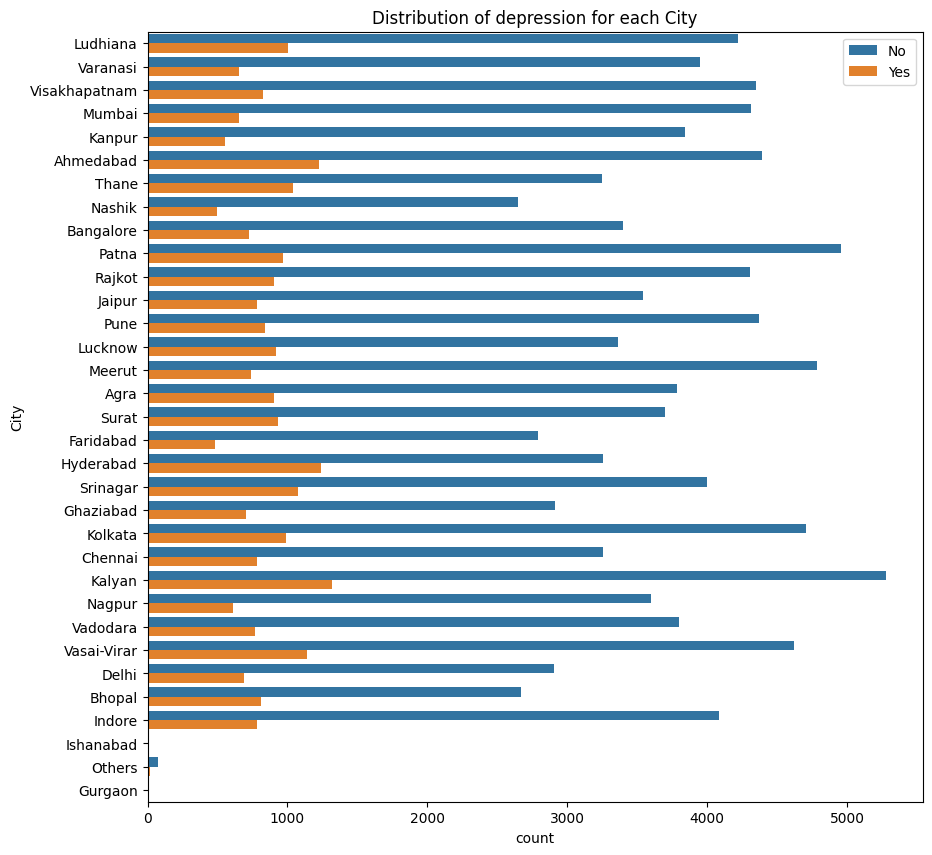

In [25]:
plt.figure(figsize=(10, 10))
sns.countplot(data, y="City", hue="Depression")
plt.title("Distribution of depression for each City")
plt.legend(["No", "Yes"])
plt.show()

In [26]:
## Percentage of Depressed in each city
depression_percentage = data.groupby("City")["Depression"].mean() * 100
print(depression_percentage.sort_values(ascending=False))

City
Ishanabad        100.000000
Hyderabad         27.513345
Thane             24.224761
Bhopal            23.251799
Ahmedabad         21.788705
Lucknow           21.401869
Srinagar          21.166732
Surat             20.189819
Kalyan            19.963592
Vasai-Virar       19.791847
Ghaziabad         19.524993
Chennai           19.436202
Ludhiana          19.269039
Agra              19.235696
Delhi             19.170840
Others            18.888889
Jaipur            18.137708
Bangalore         17.560029
Kolkata           17.357695
Rajkot            17.322835
Vadodara          16.768827
Patna             16.323430
Pune              16.103647
Indore            16.091954
Visakhapatnam     15.919629
Nashik            15.871501
Faridabad         14.687882
Nagpur            14.492754
Varanasi          14.220582
Meerut            13.404486
Mumbai            13.129279
Kanpur            12.573897
Gurgaon            0.000000
Name: Depression, dtype: float64


Ishanabad and Gurgaon looks like an outlier. We should put these cities into 'Others' as well to avoid strong bias in future.

In [27]:
data.loc[data["City"] == "Ishanabad", "City"] = "Others"
data.loc[data["City"] == "Gurgaon", "City"] = "Others"

City
Hyderabad        27.513345
Thane            24.224761
Bhopal           23.251799
Ahmedabad        21.788705
Lucknow          21.401869
Srinagar         21.166732
Surat            20.189819
Kalyan           19.963592
Vasai-Virar      19.791847
Others           19.565217
Ghaziabad        19.524993
Chennai          19.436202
Ludhiana         19.269039
Agra             19.235696
Delhi            19.170840
Jaipur           18.137708
Bangalore        17.560029
Kolkata          17.357695
Rajkot           17.322835
Vadodara         16.768827
Patna            16.323430
Pune             16.103647
Indore           16.091954
Visakhapatnam    15.919629
Nashik           15.871501
Faridabad        14.687882
Nagpur           14.492754
Varanasi         14.220582
Meerut           13.404486
Mumbai           13.129279
Kanpur           12.573897
Name: Depression, dtype: float64


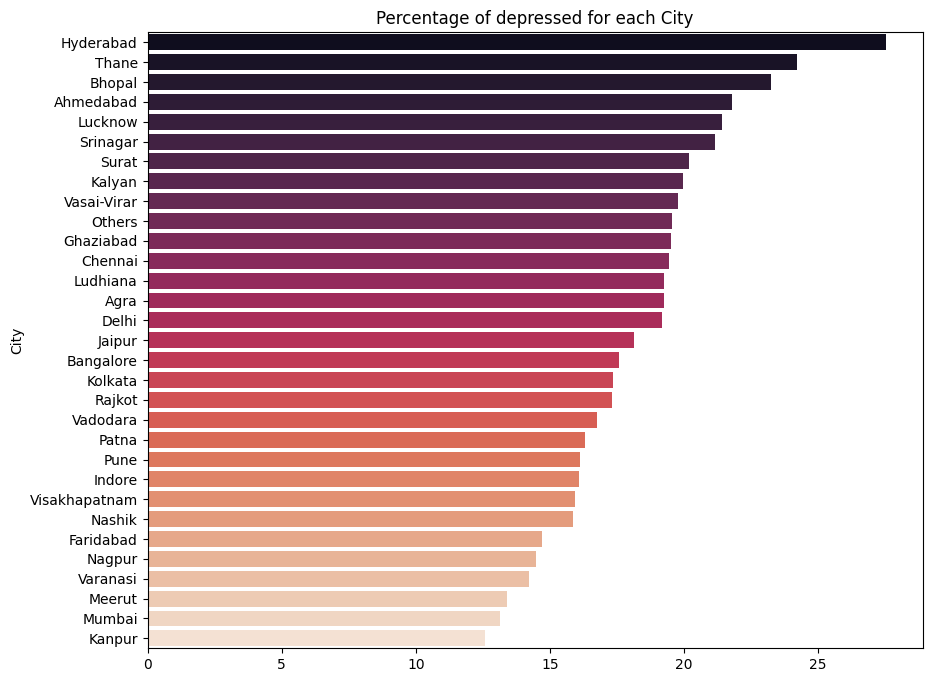

In [28]:
depression_percentage = data.groupby("City")["Depression"].mean() * 100
print(depression_percentage.sort_values(ascending=False))
depression_percentage_sorted = depression_percentage.sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(
    y=depression_percentage_sorted.index,
    x=depression_percentage_sorted.values,
    palette="rocket",
)
plt.title("Percentage of depressed for each City")
plt.show()

Performing mean encoding for the city column

In [29]:
city_mean_encoded = data.groupby("City")["Depression"].mean()
data["City_encoded"] = data["City"].map(city_mean_encoded)

In [30]:
data = data.drop(["City"], axis=1)

In [31]:
## Working Professional or Student
return_null_values("Working Professional or Student")

Null values in Working Professional or Student column are = 0


In [32]:
return_value_counts("Working Professional or Student")

Count of unique values in Working Professional or Student column are:
 Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64


In [33]:
data["Student"] = data[
    "Working Professional or Student"
].map({"Working Professional": 0, "Student": 1})

In [34]:
data = data.drop("Working Professional or Student", axis=1)

In [35]:
### Profession
return_null_values("Profession")
return_value_counts("Profession")

Null values in Profession column are = 36630
Count of unique values in Profession column are:
 Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64


In [36]:
data[data["Profession"] == "Unemployed"]

,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_Female,Gender_Male,Age_Group,City_encoded,Student
322,Unemployed,NaN,1.0,NaN,NaN,5.0,5-6 hours,Unhealthy,B.Pharm,No,4.0,3.0,Yes,0,0.0,1.0,4,0.131293,0
78938,Unemployed,NaN,1.0,NaN,NaN,4.0,7-8 hours,Unhealthy,BBA,Yes,5.0,5.0,Yes,1,0.0,1.0,0,0.199636,0
115614,Unemployed,NaN,3.0,NaN,NaN,4.0,Less than 5 hours,Moderate,MSc,Yes,10.0,4.0,Yes,0,1.0,0.0,2,0.142206,0


In [37]:
null_profession = data[data["Profession"].isnull()][["Profession", "Student"]]
null_profession.head()

,Profession,Student
2,NaN,1
8,NaN,1
26,NaN,1
29,NaN,0
30,NaN,1


In [38]:
null_profession["Student"].value_counts()

Student
1    27867
0     8763
Name: count, dtype: int64

Replace all the null values who are Students with "Student" as their profession

In [39]:
data.loc[
    (data["Profession"].isnull())
    & (data["Student"] == 1),
    "Profession",
] = "Student"

For the rest of null values, we can replace with unemployed as they are Working Professionals.

In [40]:
data.loc[data["Profession"].isnull(), "Profession"] = "Unemployed"

In [41]:
data["Profession"].unique()

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Unemployed',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Yogesh', 'Dev', 'MBA', 'LLM',
       'BCA', 'Academic', 'Profession', 'FamilyVirar', 'City Manager',
       'BBA', 'Medical Doctor', 'Working Professional', 'MBBS', 'Patna',
       'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed', 'Analyst',
       'Pranav', 'Visakhapatnam', 'PhD', '

In [42]:
data.loc[data["Profession"]=="Finanancial Analyst", "Profession"] = "Financial Analyst"
data.loc[data["Profession"]=="Dev", "Profession"] = "Software Engineer"
data.loc[data["Profession"]=="City Manager", "Profession"] = "Manager"
data.loc[data["Profession"]=="Analyst", "Profession"] = "Business Analyst"

In [43]:
data.loc[data["Profession"]=="Medical Doctor", "Profession"] = "Doctor"

In [44]:
profession_to_change = [
    "B.Com",
    "BE",
    "Yogesh",
    "MBA",
    "LLM",
    "BCA",
    "Academic",
    "Profession",
    "FamilyVirar",
    "BBA",
    "Working Professional",
    "MBBS",
    "Patna",
    "Unveil",
    "B.Ed",
    "Nagpur",
    "Moderate",
    "M.Ed",
    "Pranav",
    "Visakhapatnam",
    "PhD",
    "Yuvraj",
]

In [45]:
data[data["Profession"].isin(profession_to_change)][
    [
        "Profession",
        "Depression",
        "Student",
        "Work Pressure",
        "Job Satisfaction",
    ]
]

,Profession,Depression,Student,Work Pressure,Job Satisfaction
8957,B.Com,0,0,2.0,3.0
10782,BE,0,0,5.0,2.0
12526,Yogesh,1,0,4.0,1.0
14641,MBA,0,0,5.0,5.0
21693,LLM,0,0,2.0,3.0
22850,BCA,0,0,4.0,1.0
23789,Academic,0,0,4.0,2.0
24617,Profession,0,0,5.0,1.0
28927,Yogesh,1,0,5.0,1.0
29926,FamilyVirar,0,0,3.0,1.0


In [46]:
data.loc[data["Profession"].isin(profession_to_change), "Profession"] = "Others"

In [47]:
data["Profession"].unique()

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Financial Analyst', 'Chemist', 'Electrician', 'Software Engineer',
       'Data Scientist', 'Plumber', 'Marketing Manager', 'Accountant',
       'Entrepreneur', 'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Unemployed', 'Educational Consultant', 'Civil Engineer',
       'Manager', 'Pharmacist', 'Architect', 'Mechanical Engineer',
       'Customer Support', 'Consultant', 'Judge', 'Researcher', 'Pilot',
       'Graphic Designer', 'Travel Consultant', 'Digital Marketer',
       'Lawyer', 'Research Analyst', 'Sales Executive', 'Doctor',
       'Investment Banker', 'Family Consultant', 'Others'], dtype=object)

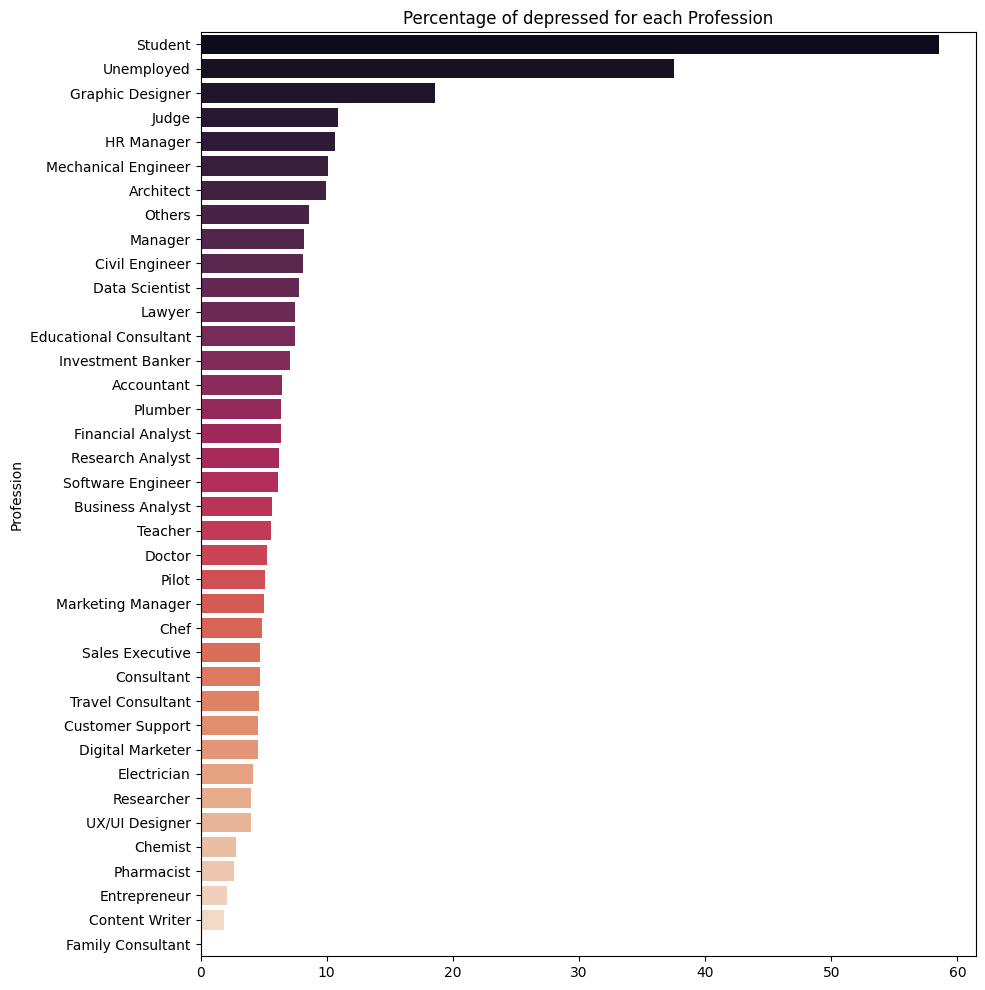

In [48]:
depression_percentage = data.groupby("Profession")["Depression"].mean() * 100
depression_percentage_sorted = depression_percentage.sort_values(ascending=False)
plt.figure(figsize=(10, 12))
sns.barplot(
    y=depression_percentage_sorted.index,
    x=depression_percentage_sorted.values,
    palette="rocket",
)
plt.title("Percentage of depressed for each Profession")
plt.show()

In [49]:
depression_percentage_sorted

Profession
Student                   58.506135
Unemployed                37.508556
Graphic Designer          18.572657
Judge                     10.864486
HR Manager                10.691198
Mechanical Engineer       10.110450
Architect                  9.908467
Others                     8.571429
Manager                    8.170311
Civil Engineer             8.095238
Data Scientist             7.782427
Lawyer                     7.504521
Educational Consultant     7.468443
Investment Banker          7.124682
Accountant                 6.422704
Plumber                    6.407323
Financial Analyst          6.407165
Research Analyst           6.231884
Software Engineer          6.154864
Business Analyst           5.660974
Teacher                    5.564924
Doctor                     5.282555
Pilot                      5.122844
Marketing Manager          5.060729
Chef                       4.856744
Sales Executive            4.715354
Consultant                 4.705604
Travel Consultant

In [50]:
## combine family consultant to others
data.loc[data["Profession"] == "Family Consultant", "Profession"] = "Others"

In [51]:
profession_mean_encoded = data.groupby("Profession")["Depression"].mean()
data["Profession_encoded"] = data["Profession"].map(profession_mean_encoded)

In [52]:
data = data.drop(["Profession"], axis=1)

In [53]:
return_null_values("Work Pressure")

Null values in Work Pressure column are = 27918


In [54]:
## Academic Pressure and Work Pressure
data["Work Pressure"].fillna(data["Academic Pressure"], inplace=True)

In [55]:
return_null_values("Work Pressure")

Null values in Work Pressure column are = 21


In [56]:
median_pressure = data["Work Pressure"].median()
median_pressure

3.0

In [57]:
## Replacing rest null values with median
data["Work Pressure"].fillna(median_pressure, inplace=True)

In [58]:
data = data.drop(["Academic Pressure"], axis=1)

In [59]:
## Study Satisfaction and Job Satisfaction
data["Job Satisfaction"].fillna(data["Study Satisfaction"], inplace=True)
median_satisfaction = data["Job Satisfaction"].median()
print("Median Satisfaction =", median_satisfaction)
data["Job Satisfaction"].fillna(median_satisfaction, inplace=True)
data = data.drop(["Study Satisfaction"], axis=1)

Median Satisfaction = 3.0


In [60]:
## CGPA
return_null_values("CGPA")

Null values in CGPA column are = 112802


In [61]:
data["CGPA"].fillna(-1, inplace=True)

In [62]:
data["CGPA"] = np.round(data["CGPA"])

In [63]:
## Sleep Duration
return_null_values("Sleep Duration")

Null values in Sleep Duration column are = 0


In [64]:
return_value_counts("Sleep Duration")

Count of unique values in Sleep Duration column are:
 Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours    

In [65]:
data["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [66]:
sleep_duration = {
    "More than 8 hours": 8,
    "5-6 hours": 6,
    "7-8 hours": 8,
    "1-2 hours": 5, ## less than 5
    "6-8 hours": 7,
    "4-6 hours": 5,
    "6-7 hours": 7,
    "10-11 hours": 8,  ## more than 8
    "8-9 hours": 8,  ## more than 8
    "40-45 hours": 6,  ## weekly
    "9-11 hours": 8,  ## more than 8
    "2-3 hours": 5,  ## less than 5
    "3-4 hours": 5,  ## less than 5
    "Moderate": 7,
    "55-66 hours": 8,  ## weekly
    "4-5 hours": 5,  ## less than 5
    "9-6 hours": 8,
    "1-3 hours": 5,  ## less than 5
    "45": 6,
    "1-6 hours": 6,
    "35-36 hours": 5,  ## less than 5
    "8 hours": 8,
    "10-6 hours": 8,
    "than 5 hours": 5,
    "49 hours": 7,  ## weekly
    "3-6 hours": 5,
    "45-48 hours": 7,  ## weekly
    "9-5": 7,
    "9-5 hours": 7,
    "Less than 5 hours": 5,
}

In [67]:
data["Sleep Duration"] = data["Sleep Duration"].map(sleep_duration)

In [68]:
return_value_counts("Sleep Duration")

Count of unique values in Sleep Duration column are:
 Sleep Duration
8.0    69705
5.0    38818
6.0    32149
7.0       17
Name: count, dtype: int64


In [69]:
return_null_values("Sleep Duration")

Null values in Sleep Duration column are = 11


In [70]:
sleep_mode = data["Sleep Duration"].mode()[0]
sleep_mode

8.0

In [71]:
data["Sleep Duration"].fillna(sleep_mode, inplace=True)

In [72]:
## Dietary Habits
return_null_values("Dietary Habits")

Null values in Dietary Habits column are = 4


In [73]:
return_value_counts("Dietary Habits")

Count of unique values in Dietary Habits column are:
 Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64


In [74]:
dietary_habits = {
    "Unhealthy": 2,
    "Moderate": 1,
    "Healthy": 0,
    "More Healthy": 0,
    "No Healthy": 2,
    "Less Healthy": 2,
    "Less than Healthy": 1,
}
data["Dietary Habits"] = data["Dietary Habits"].map(dietary_habits)

In [75]:
return_null_values("Dietary Habits")

Null values in Dietary Habits column are = 22


In [76]:
## Fill na with "moderate":1
data["Dietary Habits"].fillna(1, inplace=True)

In [77]:
## Have you ever had suicidal thoughts ?
return_null_values("Have you ever had suicidal thoughts ?")

Null values in Have you ever had suicidal thoughts ? column are = 0


In [78]:
return_value_counts("Have you ever had suicidal thoughts ?")

Count of unique values in Have you ever had suicidal thoughts ? column are:
 Have you ever had suicidal thoughts ?
No     71138
Yes    69562
Name: count, dtype: int64


In [79]:
suicidal_thoughts = {"No": 0, "Yes": 1}
data["suicidal_thoughts"] = data["Have you ever had suicidal thoughts ?"].map(
    suicidal_thoughts
)

In [80]:
data = data.drop(["Have you ever had suicidal thoughts ?"], axis=1)

In [81]:
## Family History of Mental Illness
return_null_values("Family History of Mental Illness")

Null values in Family History of Mental Illness column are = 0


In [82]:
return_value_counts("Family History of Mental Illness")

Count of unique values in Family History of Mental Illness column are:
 Family History of Mental Illness
No     70758
Yes    69942
Name: count, dtype: int64


In [83]:
family_history = {"No": 0, "Yes": 1}
data["family_history"] = data["Family History of Mental Illness"].map(
    family_history
)

In [84]:
data = data.drop(["Family History of Mental Illness"], axis=1)

In [85]:
## Financial Stress
return_null_values("Financial Stress")

Null values in Financial Stress column are = 4


In [86]:
return_value_counts("Financial Stress")

Count of unique values in Financial Stress column are:
 Financial Stress
2.0    31451
5.0    28279
4.0    27765
1.0    27211
3.0    25990
Name: count, dtype: int64


In [87]:
data["Financial Stress"].fillna(data["Financial Stress"].median(), inplace=True)

In [88]:
## Work/Study Hours
return_null_values("Work/Study Hours")

Null values in Work/Study Hours column are = 0


In [89]:
return_value_counts("Work/Study Hours")

Count of unique values in Work/Study Hours column are:
 Work/Study Hours
10.0    14199
11.0    12832
9.0     12711
0.0     12066
12.0    11409
2.0     10595
6.0     10432
7.0      9872
1.0      9802
3.0      9474
5.0      9337
4.0      9065
8.0      8906
Name: count, dtype: int64


In [90]:
## Degree
return_null_values("Degree")

Null values in Degree column are = 2


In [91]:
return_value_counts("Degree")

Count of unique values in Degree column are:
 Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 115, dtype: int64


In [92]:
data["Degree"].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [93]:
bachelors = data[data["Degree"].str.startswith("B", na=False)]["Degree"].unique()
masters = data[data["Degree"].str.startswith("M", na=False)]["Degree"].unique()

In [94]:
data["Degree"] = data["Degree"].replace(bachelors, "bachelors")

In [95]:
data["Degree"] = data["Degree"].replace(masters, "masters")

In [96]:
data["Degree"].unique()

array(['bachelors', 'LLB', 'masters', 'Class 12', 'PhD', 'LLM',
       'UX/UI Designer', 'Nalini', 'Veda', 'S.Tech', 'Degree', '20',
       'Class 11', 'H_Pharm', 'P.Com', 'LL.Com', 'Data Scientist', 'L.Ed',
       'P.Pharm', 'Kalyan', 'Unite', 'HR Manager', 'S.Pharm', 'LLBA',
       'Vrinda', '0', 'LLCom', '29', 'Vivaan', 'Plumber', '5.61', 'Ritik',
       '5.56', '7.06', 'ACA', 'CGPA', '24', 'Pihu', 'Jhanvi', 'LLTech',
       'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch', 'HCA',
       '5.88', 'LL B.Ed', 'Navya', nan, 'K.Ed', 'Working Professional',
       'Esha', 'LLS', 'LLEd', 'E.Tech', 'Doctor', 'N.Pharm', 'LCA', 'RCA',
       'Advait'], dtype=object)

In [97]:
degrees = {
    "bachelors": "bachelors",
    "masters": "masters",
    "PhD": "PhD",
    "LLB": "bachelors",
    "Class 12": "high_school",
    "LLM": "masters",
    "LL.Com": "masters",
    "LLCom": "masters",
    "LLTech": "bachelors",
    "LL B.Ed": "bachelors",
    "Doctor": "PhD",
    "N.Pharm": "masters",
}
data["Degree"] = data["Degree"].map(degrees)

In [98]:
data["Degree"].fillna("Others", inplace=True)

In [99]:
return_value_counts("Degree")

Count of unique values in Degree column are:
 Degree
bachelors      70160
masters        52645
high_school    14729
PhD             3104
Others            62
Name: count, dtype: int64


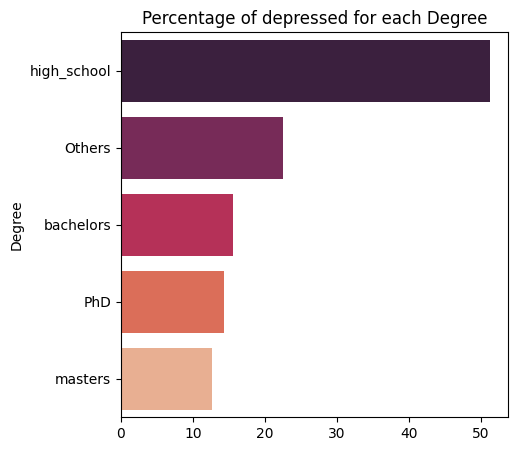

In [100]:
depression_percentage = data.groupby("Degree")["Depression"].mean() * 100
depression_percentage_sorted = depression_percentage.sort_values(ascending=False)
plt.figure(figsize=(5, 5))
sns.barplot(
    y=depression_percentage_sorted.index,
    x=depression_percentage_sorted.values,
    palette="rocket",
)
plt.title("Percentage of depressed for each Degree")
plt.show()

In [101]:
degree_map = {"others": 0, "high_school": 1, "bachelors": 2, "masters": 3, "PhD": 4}
data["Degree"] = data["Degree"].map(degree_map)

In [102]:
data.head()

,Work Pressure,CGPA,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Depression,Gender_Female,Gender_Male,Age_Group,City_encoded,Student,Profession_encoded,suicidal_thoughts,family_history
0,5.0,-1.0,2.0,8.0,0.0,2.0,1.0,2.0,0,1.0,0.0,3,0.192690,0,0.048567,0,0
1,4.0,-1.0,3.0,5.0,2.0,2.0,7.0,3.0,1,0.0,1.0,0,0.142206,0,0.055649,1,0
2,5.0,9.0,2.0,6.0,0.0,2.0,3.0,1.0,1,0.0,1.0,1,0.159196,1,0.585061,1,0
3,5.0,-1.0,1.0,5.0,1.0,2.0,10.0,1.0,1,0.0,1.0,0,0.131293,0,0.055649,1,1
4,1.0,-1.0,1.0,6.0,2.0,2.0,9.0,4.0,0,1.0,0.0,1,0.125739,0,0.056610,1,1


<Axes: >

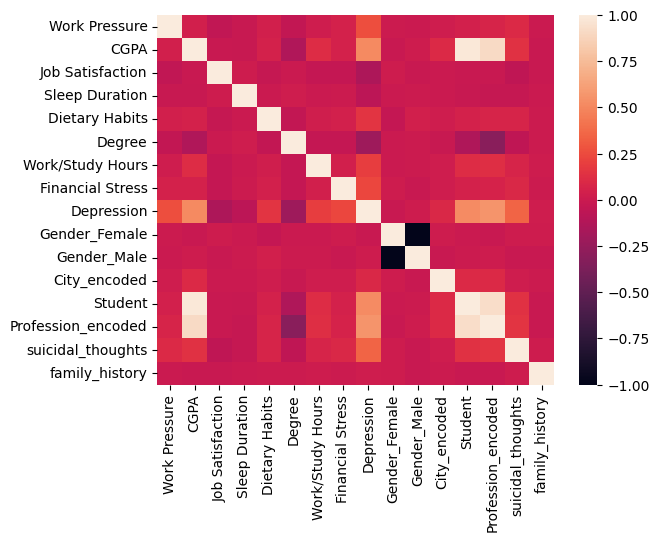

In [103]:
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix)

In [104]:
data.to_csv("../data/cleaned_v1.csv", index=False)